In [84]:
## Exploratory Data Analysis

In [85]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
## import data
animals = pd.read_csv('super-animals.csv')

In [87]:
## look at data
animals

,Number,Animal,Category,Species,Age,Weight,Size,Speed,Vulnerability,Updated
0,1,White headed vulture,Savanna,Bird,20.0,4.7,85.0,48.0,1,No
1,2,Secretarybird,Savanna,Bird,12.0,4.0,152.0,65.0,2,Yes
2,3,Kudu,Savanna,Mammal,15.0,227.0,240.0,70.0,4,Yes
3,4,Blue wildebeest,Savanna,Mammal,20.0,250.0,240.0,80.0,4,No
4,5,Giraffe,Savanna,Mammal,25.0,828.0,505.0,56.0,4,No
...,...,...,...,...,...,...,...,...,...,...
103,104,Atlantic herring,Ocean,Fish,20.0,1.0,39.0,4.0,4,Yes
104,105,Cusk eel,Ocean,Fish,30.0,25.0,200.0,4.0,4,No
105,106,Oyster toadfish,Ocean,Fish,8.0,0.6,38.0,9.0,4,No
106,107,Cape rock lobster,Ocean,Crustacean,50.0,5.0,46.0,18.0,4,No


In [88]:
## list variable names
list(animals)

['Number',
 'Animal',
 'Category',
 'Species',
 'Age',
 'Weight',
 'Size',
 'Speed',
 'Vulnerability',
 'Updated']

In [89]:
## shape of data
animals.shape

(108, 10)

In [90]:
## info
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Number         108 non-null    int64  
 1   Animal         108 non-null    object 
 2   Category       108 non-null    object 
 3   Species        108 non-null    object 
 4   Age            108 non-null    float64
 5   Weight         108 non-null    float64
 6   Size           108 non-null    float64
 7   Speed          108 non-null    float64
 8   Vulnerability  108 non-null    int64  
 9   Updated        108 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 8.6+ KB


In [91]:
## describe the numerical
animals.describe()

,Number,Age,Weight,Size,Speed,Vulnerability
count,108.00000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,54.50000,20.283324,1427.288688,160.615741,41.152778,3.518519
std,31.32092,16.629752,9050.828306,260.339232,26.606905,0.932101
min,1.00000,0.083000,0.000100,0.300000,0.500000,1.000000
25%,27.75000,10.000000,0.361250,35.000000,19.750000,4.000000
50%,54.50000,15.000000,3.500000,84.500000,40.000000,4.000000
75%,81.25000,23.250000,50.825000,164.000000,55.000000,4.000000
max,108.00000,100.000000,80000.000000,1800.000000,160.000000,4.000000


In [92]:
animals.dtypes

Number             int64
Animal            object
Category          object
Species           object
Age              float64
Weight           float64
Size             float64
Speed            float64
Vulnerability      int64
Updated           object
dtype: object

#### Visualisations

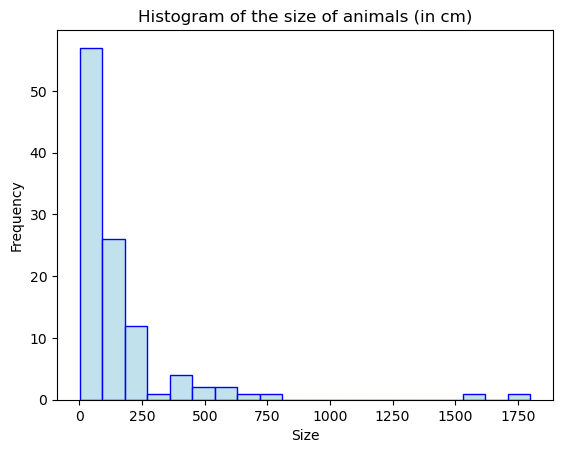

In [93]:
## draw hist plot
size = sns.histplot(data= animals, x= 'Size', 
                    color= 'lightblue', edgecolor= 'b',
                    bins= 20)
size.set(ylabel= 'Frequency', title= 'Histogram of the size of animals (in cm)')

plt.show()

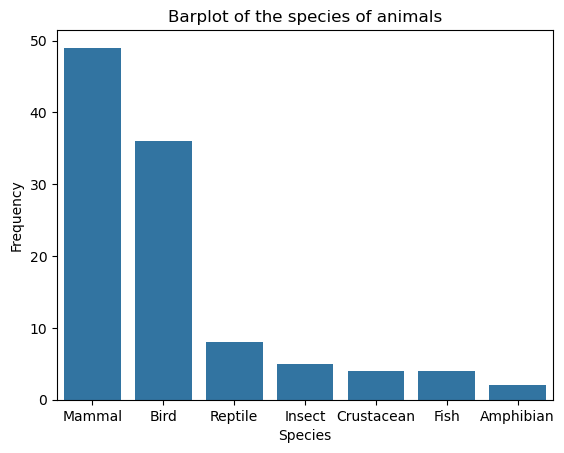

In [94]:
## make a frequency table from species
species = animals['Species'].value_counts()

## calculate the proportions
species_proportions = animals['Species'].value_counts(normalize= True)

## draw a barplot of animal species included in the 
spec = sns.barplot(x= species.index, y= species.values
                   )
spec.set(ylabel= 'Frequency', 
         title= 'Barplot of the species of animals')

plt.show()

In [95]:
## frequency table of categories and species
twoway = pd.crosstab(animals['Category'], animals['Species'])

In [96]:
twoway

Species,Amphibian,Bird,Crustacean,Fish,Insect,Mammal,Reptile
Category,,,,,,,
Coast,0,6,1,0,1,4,0
Forest,0,3,0,0,1,7,1
Fynbos,2,5,0,0,0,3,2
Nama Karoo,0,2,0,0,0,8,2
Ocean,0,0,3,4,0,5,0
Savanna,0,3,0,0,1,8,0
Succulent Karoo,0,1,0,0,2,7,2
Thicket,0,8,0,0,0,4,0
Wetland,0,8,0,0,0,3,1


In [97]:
animals['Vulnerability']

0      1
1      2
2      4
3      4
4      4
      ..
103    4
104    4
105    4
106    4
107    4
Name: Vulnerability, Length: 108, dtype: int64

In [98]:
## recode the vulnerability column
## 1 - Critically Endangered (CR)
## 2 - Vulnerable (VU)
## 3 - Near Threatened (NT)
## 4 - Least Concern (LC)

recode_dict = {
              1: 'CR',
              2: 'VU',
              3: 'NT',
              4: 'LC'
}

In [99]:
animals['Vulnerability'] = animals['Vulnerability'].map(recode_dict)

In [100]:
animals['Vulnerability']

0      CR
1      VU
2      LC
3      LC
4      LC
       ..
103    LC
104    LC
105    LC
106    LC
107    LC
Name: Vulnerability, Length: 108, dtype: object

In [101]:
## create a data set that only contains the birds (subset)
birds = animals.loc[animals['Species'] == 'Bird', :]

In [102]:
birds

,Number,Animal,Category,Species,Age,Weight,Size,Speed,Vulnerability,Updated
0,1,White headed vulture,Savanna,Bird,20.0,4.700,85.0,48.0,CR,No
1,2,Secretarybird,Savanna,Bird,12.0,4.000,152.0,65.0,VU,Yes
9,10,Lilac breasted roller,Savanna,Bird,15.0,0.100,38.0,54.0,LC,No
13,14,African jacana,Wetland,Bird,6.5,0.140,32.0,80.0,LC,Yes
14,15,Greater flamingo,Wetland,Bird,30.0,3.500,150.0,50.0,LC,Yes
15,16,Blue crane,Wetland,Bird,30.0,5.090,120.0,40.0,VU,Yes
17,18,Giant kingfisher,Wetland,Bird,10.0,0.375,46.0,40.0,LC,Yes
19,20,Southern bald ibis,Wetland,Bird,15.0,1.100,80.0,35.0,VU,Yes
20,21,African fish eagle,Wetland,Bird,24.0,2.500,75.0,80.0,LC,Yes
22,23,Brown hooded kingfisher,Wetland,Bird,20.0,0.580,23.0,17.0,LC,No


<Axes: xlabel='Vulnerability'>

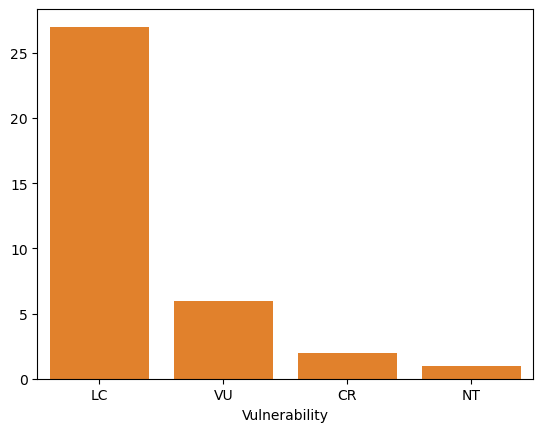

In [103]:
## create a frequency table of the vulnerability indices
birds_vulnerability = birds['Vulnerability'].value_counts()

## draw barplot of vulnerability
sns.barplot(x= birds_vulnerability.index, y= birds_vulnerability.values)

## sort the vulnerability index
birds_vulner_sorted = birds_vulnerability.reindex(['CR', 'VU', 'NT', 'LC'])
sns.barplot(x= birds_vulner_sorted.index, y= birds_vulner_sorted.values)

In [104]:
## obtain a quick summary of the size of the birds
birds['Size'].describe()

count     36.000000
mean      66.319444
std       47.882170
min       13.000000
25%       32.750000
50%       58.500000
75%       86.000000
max      200.000000
Name: Size, dtype: float64

In [105]:
## obtain summary of each
## average size of the birds
birds['Size'].mean()

66.31944444444444

In [106]:
## minimum size of the birds
birds['Size'].min()

13.0

In [107]:
## max
birds['Size'].max()

200.0

In [108]:
## standard deviation
birds['Size'].std()

47.882169776856216

In [109]:
## or use the summary from describe:)
summary = birds['Size'].describe()
summary['max']

200.0

In [110]:
summary['std']

47.882169776856216

<Axes: xlabel='Size', ylabel='Count'>

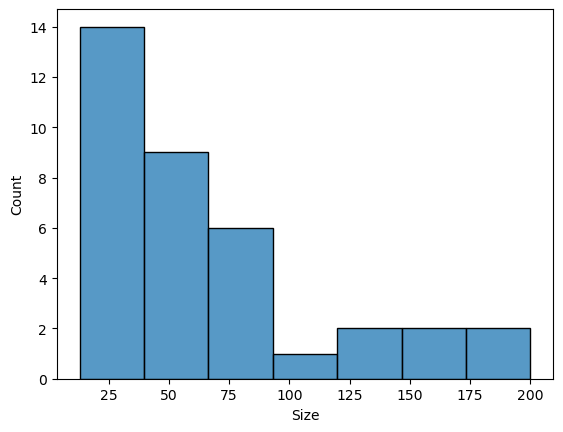

In [111]:
## draw hist of size of the birds
sns.histplot(data= birds, x= 'Size')

<Axes: xlabel='Size'>

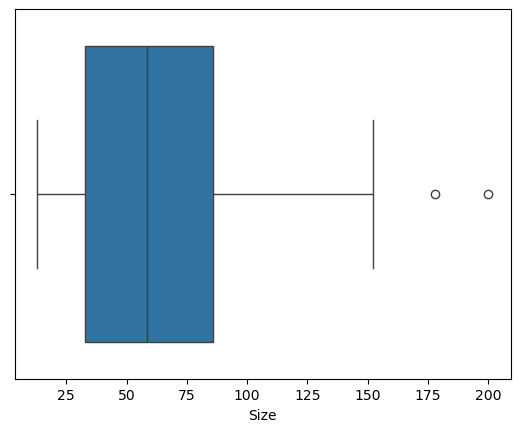

In [112]:
## draw the boxplot for the size of the birds
sns.boxplot(data= birds, x= 'Size')

In [113]:
## Median of the size of the birds
birds['Size'].median()

58.5

In [114]:
## or use the summary for median - Q2
summary['50%']

58.5

In [115]:
## interquatile range of the size of the birds : Q3 - Q1
summary['75%'] - summary['25%']

53.25

<Axes: xlabel='Size', ylabel='Weight'>

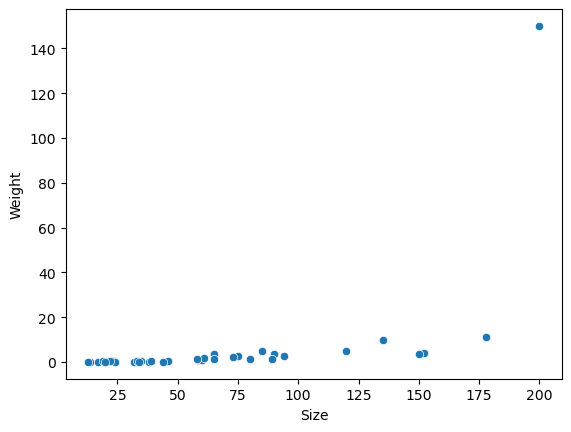

In [116]:
## draw a scatter for size and the weight of the birds
sns.scatterplot(data= birds, x= 'Size', y= 'Weight')

In [117]:
## log transformation (Linearize) on the size and the weight
birds_log_size = np.log(birds['Size'])
birds_log_weight = np.log(birds['Weight'])

<Axes: xlabel='Size', ylabel='Weight'>

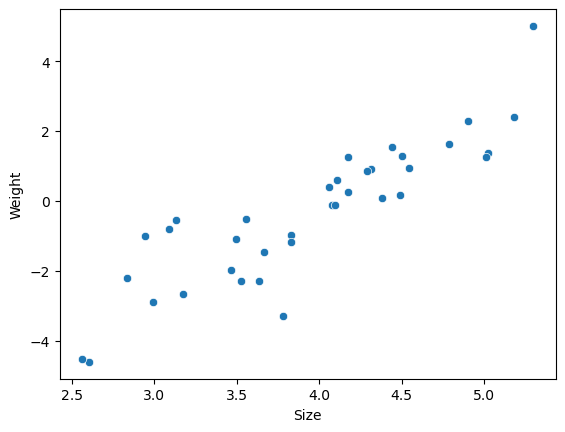

In [118]:
## draw scatter plot of linearized data
sns.scatterplot(x= birds_log_size, y= birds_log_weight)

In [119]:
## Explore Numerical data across categories
## create a five numb summary for the 

sum_species = animals.groupby(['Species'])['Size'].describe()        

In [120]:
sum_species

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Amphibian,2.0,10.000000,5.656854,6.0,8.00,10.0,12.0,14.0
Bird,36.0,66.319444,47.882170,13.0,32.75,58.5,86.0,200.0
Crustacean,4.0,23.500000,21.610183,5.0,5.00,21.5,40.0,46.0
Fish,4.0,219.250000,265.004874,38.0,38.75,119.5,300.0,600.0
Insect,5.0,3.600000,4.797395,0.3,1.10,1.6,3.0,12.0
Mammal,49.0,253.367347,342.753355,10.0,92.00,150.0,250.0,1800.0
Reptile,8.0,191.875000,211.641501,18.0,33.75,126.0,235.0,600.0


In [121]:
# you can find the summary stats for each animal
animals.groupby(['Species'])['Size'].mean()

Species
Amphibian      10.000000
Bird           66.319444
Crustacean     23.500000
Fish          219.250000
Insect          3.600000
Mammal        253.367347
Reptile       191.875000
Name: Size, dtype: float64

In [122]:
## Subset the birds and the mamals
birds_mamals = animals.loc[animals['Species'].isin(['Bird', 'Mammal']), :]

In [123]:
birds_mamals

,Number,Animal,Category,Species,Age,Weight,Size,Speed,Vulnerability,Updated
0,1,White headed vulture,Savanna,Bird,20.0,4.7,85.0,48.0,CR,No
1,2,Secretarybird,Savanna,Bird,12.0,4.0,152.0,65.0,VU,Yes
2,3,Kudu,Savanna,Mammal,15.0,227.0,240.0,70.0,LC,Yes
3,4,Blue wildebeest,Savanna,Mammal,20.0,250.0,240.0,80.0,LC,No
4,5,Giraffe,Savanna,Mammal,25.0,828.0,505.0,56.0,LC,No
...,...,...,...,...,...,...,...,...,...,...
97,98,Orca (killer whale),Ocean,Mammal,50.0,5400.0,760.0,65.0,NT,Yes
99,100,Southern right whale,Ocean,Mammal,100.0,80000.0,1600.0,10.0,LC,Yes
101,102,Humpback whale,Ocean,Mammal,60.0,50000.0,1800.0,8.0,LC,Yes
102,103,Long beaked common dolphin,Ocean,Mammal,40.0,235.0,250.0,40.0,LC,Yes


<Axes: xlabel='Size', ylabel='Species'>

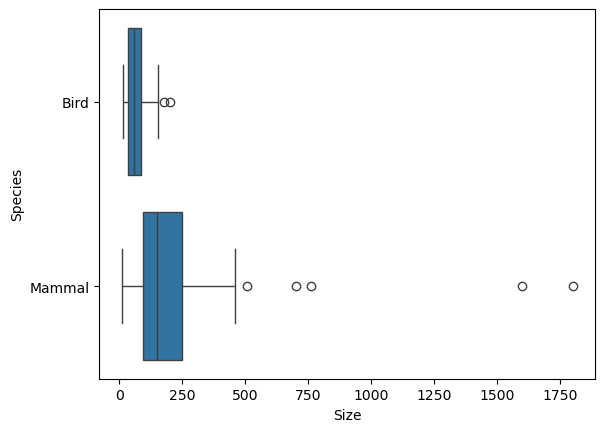

In [124]:
## draw a side-by-side boxplot
sns.boxplot(data= birds_mamals, 
            x= 'Size', y= 'Species')